<a href="https://colab.research.google.com/github/sonihetvi10/pedestrian_detection/blob/main/machine_vision_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
import random
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/new_dataset/train',
        target_size=(32,32),
        batch_size=32,
        class_mode='categorical')

Found 8218 images belonging to 2 classes.


In [ ]:
test_ds=train_datagen.flow_from_directory( '/content/drive/MyDrive/hetvi_dataset/test_1',
        target_size=(64,64),
        batch_size=12,
        class_mode='categorical')

Found 12 images belonging to 2 classes.


In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
test_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/hetvi_dataset/test_1',
        target_size=(224,224),
        batch_size=12,
        class_mode='categorical')

Found 12 images belonging to 2 classes.


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
 '/content/drive/MyDrive/new_dataset/train' ,
   labels="inferred",
  label_mode="int",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8218 files belonging to 2 classes.
Using 1643 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['non-pedestrial', 'pedestrial']


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/new_dataset/train' ,
  labels="inferred",
  label_mode="int",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8218 files belonging to 2 classes.
Using 1643 files for validation.


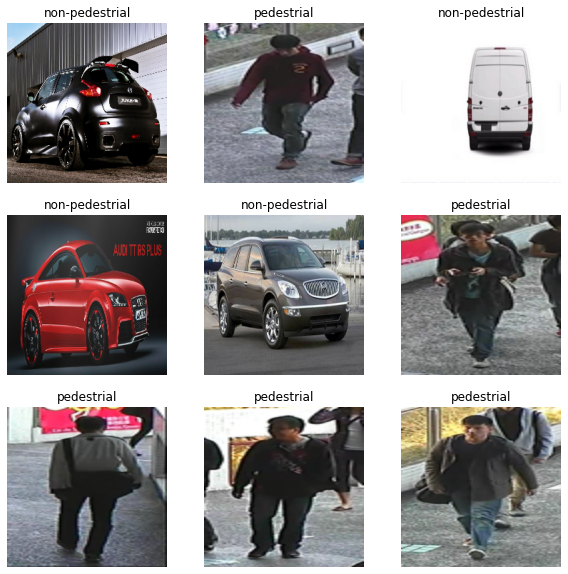

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  
  break

(32, 224, 224, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(5000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
num_classes = 2

model1 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
 
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0

In [ ]:
epochs=10
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
52/52 [==============================] - 371s 4s/step - loss: 14.7763 - accuracy: 0.5661 - val_loss: 0.6362 - val_accuracy: 0.6677
Epoch 2/10
52/52 [==============================] - 202s 4s/step - loss: 0.6330 - accuracy: 0.6756 - val_loss: 0.6368 - val_accuracy: 0.6677
Epoch 3/10
52/52 [==============================] - 202s 4s/step - loss: 0.6436 - accuracy: 0.6595 - val_loss: 0.6334 - val_accuracy: 0.6677
Epoch 4/10
52/52 [==============================] - 202s 4s/step - loss: 0.6320 - accuracy: 0.6710 - val_loss: 0.6329 - val_accuracy: 0.6677
Epoch 5/10
52/52 [==============================] - 202s 4s/step - loss: 0.6392 - accuracy: 0.6564 - val_loss: 0.6310 - val_accuracy: 0.6677
Epoch 6/10
52/52 [==============================] - 202s 4s/step - loss: 0.6304 - accuracy: 0.6673 - val_loss: 0.6254 - val_accuracy: 0.6677
Epoch 7/10
52/52 [==============================] - 200s 4s/step - loss: 0.6313 - accuracy: 0.6515 - val_loss: 0.5970 - val_accuracy: 0.6677
Epoch 8/10
5

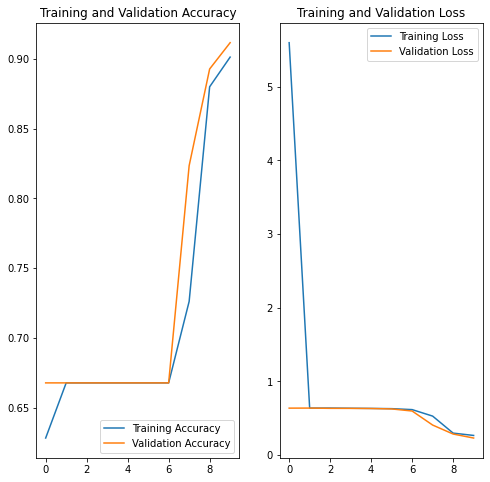

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

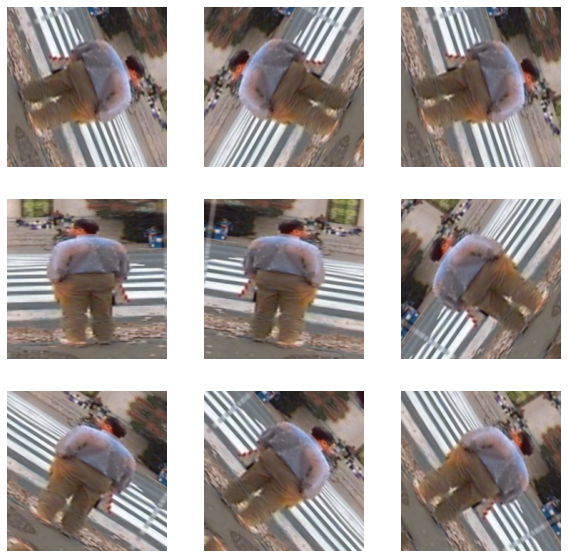

In [ ]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
model2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  
  layers.Conv2D(128, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
 
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
 
  layers.Dense(num_classes)
])

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 15
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
52/52 [==============================] - 213s 4s/step - loss: 19.3631 - accuracy: 0.5517 - val_loss: 0.6363 - val_accuracy: 0.6677
Epoch 2/15
52/52 [==============================] - 210s 4s/step - loss: 0.6248 - accuracy: 0.6858 - val_loss: 0.6365 - val_accuracy: 0.6677
Epoch 3/15
52/52 [==============================] - 209s 4s/step - loss: 0.6369 - accuracy: 0.6673 - val_loss: 0.6357 - val_accuracy: 0.6677
Epoch 4/15
52/52 [==============================] - 211s 4s/step - loss: 0.6205 - accuracy: 0.6893 - val_loss: 0.6365 - val_accuracy: 0.6677
Epoch 5/15
52/52 [==============================] - 211s 4s/step - loss: 0.6366 - accuracy: 0.6680 - val_loss: 0.6357 - val_accuracy: 0.6677
Epoch 6/15
52/52 [==============================] - 211s 4s/step - loss: 0.6305 - accuracy: 0.6767 - val_loss: 0.6358 - val_accuracy: 0.6677
Epoch 7/15
52/52 [==============================] - 210s 4s/step - loss: 0.6414 - accuracy: 0.6601 - val_loss: 0.6355 - val_accuracy: 0.6677
Epoch 8/15
5

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
IMG_SIZE=(224,224)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./225, offset= -1)

In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

In [ ]:
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

In [ ]:
inputs = tf.keras.Input(shape=(224,224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model3 = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model3.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model3.summary()

In [ ]:
len(model3.trainable_variables)

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model3.evaluate(val_ds)

In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

In [ ]:
history = model3.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from google.colab import files
uploades=files.upload()

In [ ]:
predictions = model1.predict(test_ds, steps=1, verbose=0)
predictions

In [ ]:
cm = confusion_matrix(y_true=test_ds.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['non-pedestrial','pedestrial']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
model3.save('my_model.h5')

In [ ]:
img_url2 = "/content/1.png"
img_path = tf.keras.utils.get_file('Red_sunflower', origin=img_url2)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model3.predict(img_array)
print(predictions[0])
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)])

In [ ]:
new_model = tf.keras.models.load_model('my_model.h5')

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input